In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\Yogesh Verma\Desktop\Educational Content\intern project\netflix_titles.csv")  # Adjust filename if different
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df[['duration_int', 'duration_unit']] = df['duration'].str.split(' ', expand=True)
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

## Trends


C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_22080\914993223.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


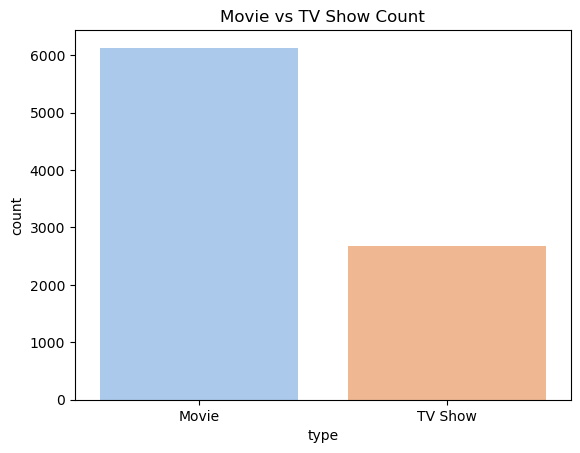

In [11]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Movie vs TV Show Count")
plt.show()


**Graph Title: Movie vs TV Show Count**

**Observations:**
- Movies significantly outnumber TV shows in the dataset.
- TV shows make up less than half of the total content.

**Inference:**
- Netflix offers a larger library of movies compared to TV shows.
- This may reflect production/ease of licensing for films or viewer preferences leaning toward shorter content formats.

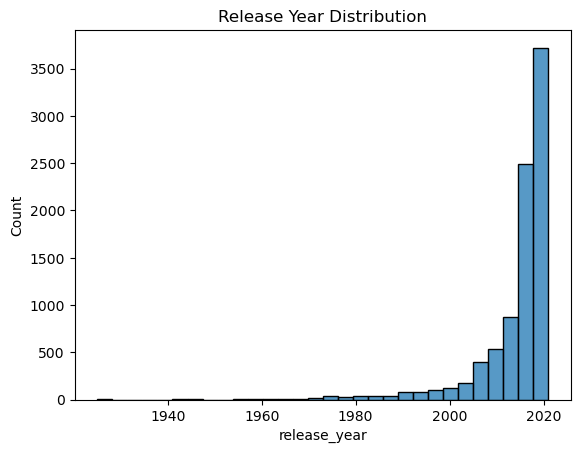

In [27]:
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Release Year Distribution")
plt.show()


**Graph Title: Release Year Distribution**

**Observations:**
- A sharp rise in content from 2000 onwards, peaking around 2018–2020.
- Very little content before the 1990s.

**Inference:**
- Netflix predominantly hosts modern and recently released content.
- The spike from 2015 onward aligns with the streaming boom and Netflix’s global expansion.

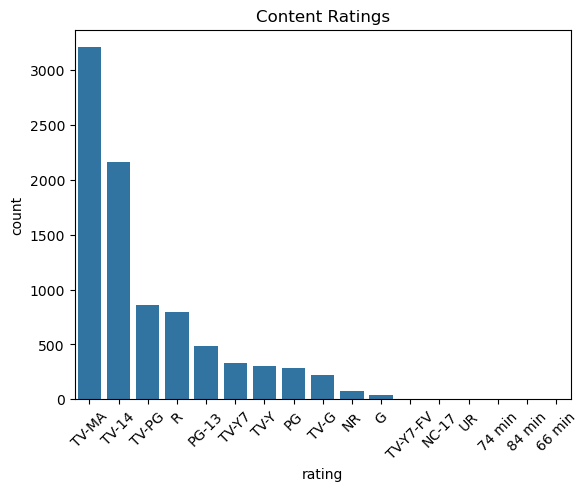

In [19]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Content Ratings")
plt.show()


**Graph Title: Content Ratings**

**Observations:**

- TV-MA (Mature Audience) has the highest number of shows/movies.
- Followed by TV-14, TV-PG, and R-rated content.
- Very few contents are rated G (General Audience), NR, or other niche categories like UR.

**Inference:**
- The majority of Netflix content is tailored toward teenagers and adults.
- There's a limited amount of content for children or general audiences, suggesting Netflix's focus on mature content.

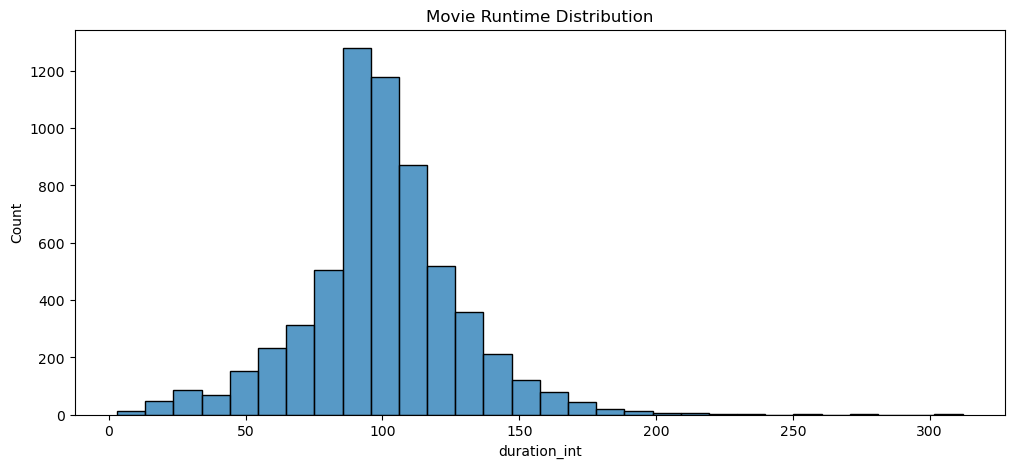

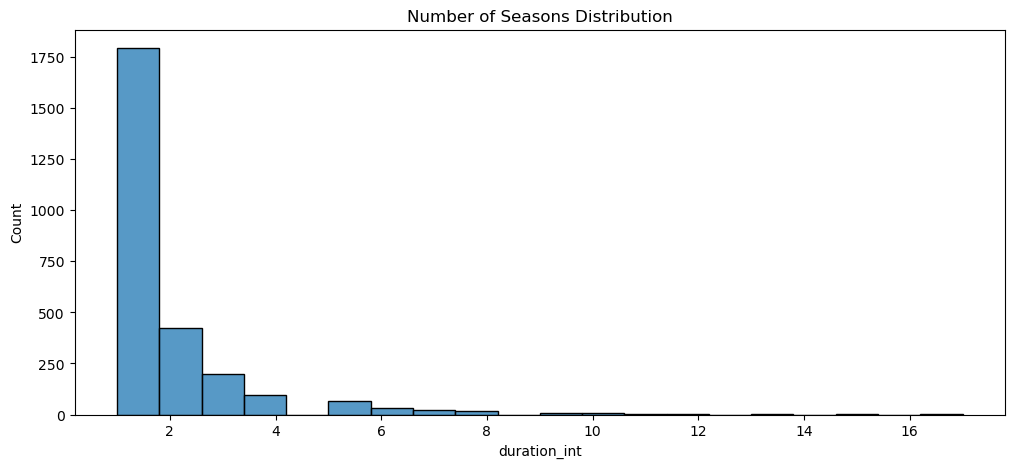

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['type']=='Movie']['duration_int'].dropna(), bins=30)
plt.title("Movie Runtime Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df[df['type']=='TV Show']['duration_int'].dropna(), bins=20)
plt.title("Number of Seasons Distribution")
plt.show()


### **Movie Runtime Distribution**
**Observation:**
- Most movies are between 80–120 minutes
- Right-skewed distribution with very few above 180 minutes.

**Inference:**
- Netflix prefers standard-length movies, likely for viewer convenience.
- Extremely long movies are rare—might be perceived as less engaging for streaming.

### **Number of Seasons (TV Shows) Distribution**
**Observation:**
- Majority of shows have only 1 season.
- Sharp decline as seasons increase.

**Inference:**
- Many are limited series or recently launched shows.
- There is less binge-worthy long-running content, which may affect user retention.



C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_18316\4068069910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


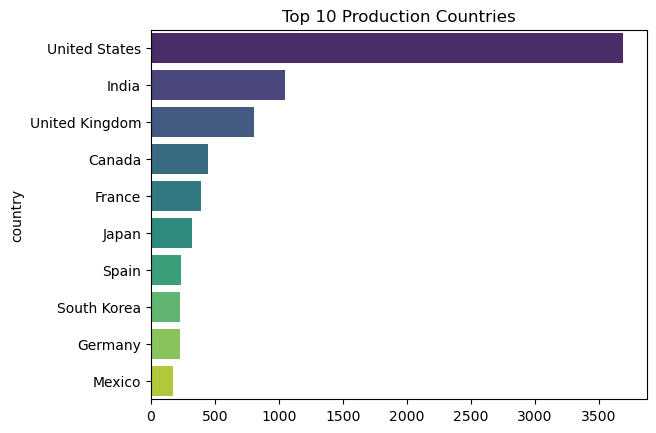

In [23]:
# Split multi-country entries
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Production Countries")
plt.show()


### Top 10 Production Countries
**Observation:**
- United States dominates content production.
- India and UK also contribute significantly.

**Inference:**
- Netflix heavily sources from North America.
- Growing influence of regional content from countries like India, Japan, and South Korea—aligns with Netflix’s localization strategy.

C:\Users\Yogesh Verma\AppData\Local\Temp\ipykernel_18316\3181199044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")


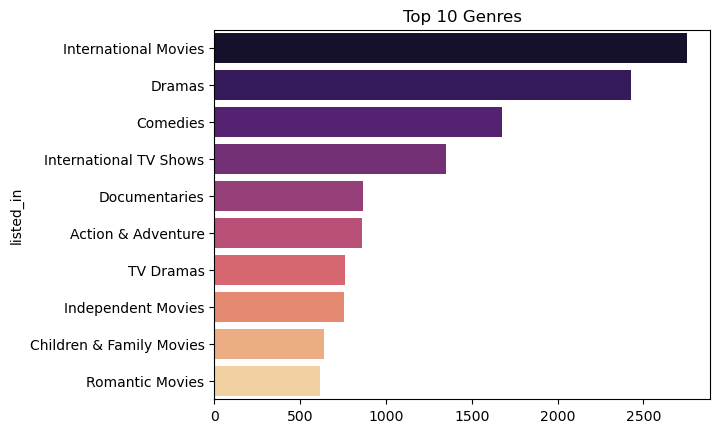

In [25]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Top 10 Genres")
plt.show()


### Top 10 Genres
**Observation:**
- International Movies, Dramas, and Comedies are most popular.
- Genres like Romantic Movies and Children & Family Movies are lower.

**Inference:**
- Netflix's audience likely prefers drama-heavy and global content.
- There's a strong international flavor, possibly reflecting diverse user demographics.

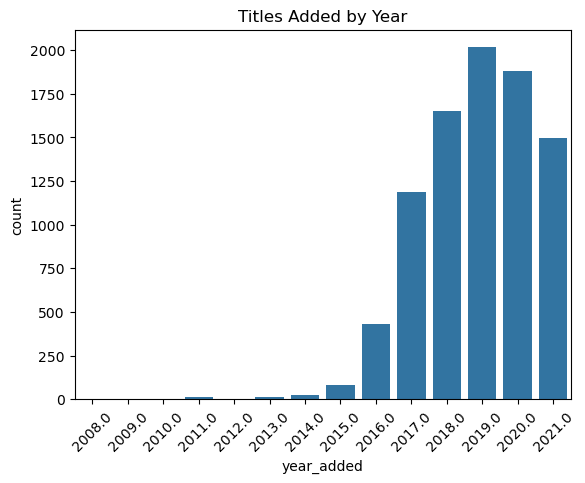

In [27]:
df['year_added'] = df['date_added'].dt.year

sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Titles Added by Year")
plt.show()


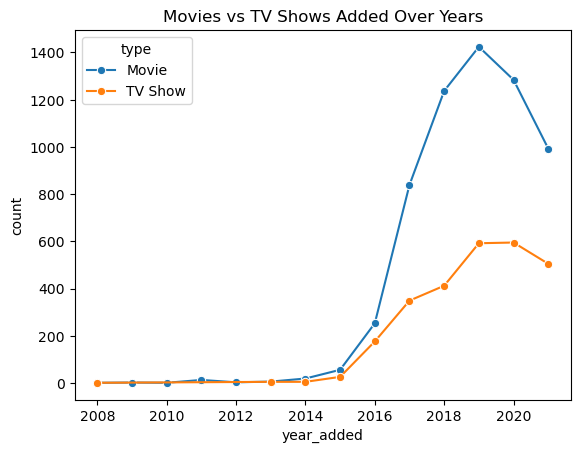

In [29]:
type_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')
sns.lineplot(data=type_year, x='year_added', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Added Over Years")
plt.show()


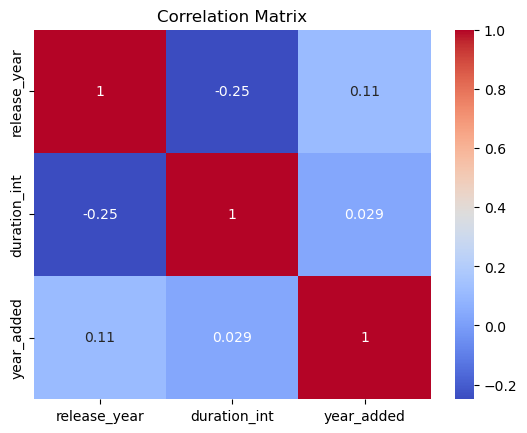

In [31]:
num_cols = ['release_year', 'duration_int', 'year_added']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Unusually long durations:
                                                  title duration   type  \
73                                         King of Boys  182 min  Movie   
166                         Once Upon a Time in America  229 min  Movie   
341                                            Magnolia  189 min  Movie   
717                         Headspace: Unwind Your Mind  273 min  Movie   
806   Seven Souls in the Skull Castle: Season Moon J...  204 min  Movie   
...                                                 ...      ...    ...   
8404      The Lord of the Rings: The Return of the King  201 min  Movie   
8405              The Lord of the Rings: The Two Towers  179 min  Movie   
8629                                           Trimurti  173 min  Movie   
8764                                         Wyatt Earp  191 min  Movie   
8770                                            Yaadein  171 min  Movie   

      duration_int  
73           182.0  
166          229.0  
341       

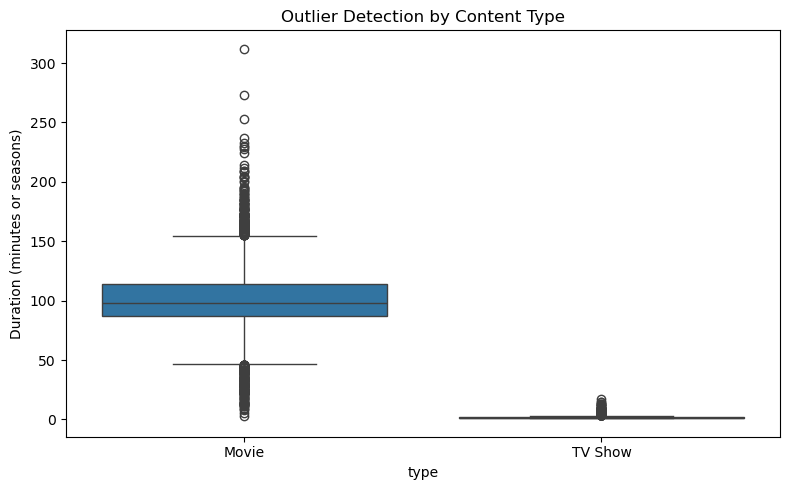

In [37]:


# Convert 'duration' column to string first to avoid .str error
df[['duration_int', 'duration_unit']] = df['duration'].astype(str).str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')


# -- Step 2: Handle 'date_added' column and extract 'release_year' --
# Safely parse 'date_added' and extract year
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year


# -- Step 3: Define 'release_year' if it's not already present --
if 'release_year' not in df.columns:
    df['release_year'] = df['year_added']  # fallback

# -- Step 4: Detect unusually long movies or multi-season shows --
outliers_duration = df[df['duration_int'] > df['duration_int'].quantile(0.99)]
print("Unusually long durations:")
print(outliers_duration[['title', 'duration', 'type', 'duration_int']])

# -- Step 5: Very old or future release years --
anomalous_years = df[(df['release_year'] < 1950) | (df['release_year'] > 2025)]
print("\nAnomalous release years:")
print(anomalous_years[['title', 'release_year']])

# -- Step 6: Nulls or rare entries in 'rating' --
print("\nRare or missing ratings:")
print(df['rating'].value_counts(dropna=False).tail(10))

# -- Step 7: Boxplot for outlier visualization --
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='duration_int', data=df)
plt.title("Outlier Detection by Content Type")
plt.ylabel("Duration (minutes or seasons)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Final Takeaways

1. **Content Growth**: 📈 Netflix’s library, especially TV shows, has grown rapidly in recent years.
2. **Geographic Concentration**: Production is dominated by a few countries.
3. **Genre Patterns**: Some genres are more prevalent in either movies or TV shotems.


### Initial Hypotheses for Modeling

1. **Hypothesis 1**: TV shows have shorter individual durations but more frequent releases post-2016.
2. **Hypothesis 2**: Content from India and the US differs significantly in average duration and genre.
3. **Hypothesis 3**: Certain ratings (e.g., TV-MA) dominate specific genres like crime or thriller.
4. **Hypothesis 4**: Newer content has a wider genre spread than older content.
5. **Hypothesis 5**: Duration is a distinguishing factor between drama and comedy genres.
